<a href="https://colab.research.google.com/github/lmartins30/SENAC-SP/blob/main/Luiz_Senac_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 10.4 MB/s 


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

breast_cancer = load_breast_cancer()

X_train_full, X_test, y_train_full, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [6]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
#MODELO BASE

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(2, activation="softmax"))


##model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
##model.add(keras.layers.PReLU())

In [8]:
##MELHOR MODELO

#model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
#model.add(keras.layers.Dense(120, activation="selu"))
#model.add(keras.layers.Dropout(rate=0.5))
#model.add(keras.layers.Dense(80, activation="selu"))
#model.add(keras.layers.Dropout(rate=0.5))
#model.add(keras.layers.Dense(40, activation="selu"))
#model.add(keras.layers.Dropout(rate=0.5))
#model.add(keras.layers.Dense(2, activation="softmax"))


##model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
##model.add(keras.layers.PReLU())

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 120)               3720      
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 80)                9680      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                3240      
                                                                 
 dropout_2 (Dropout)         (None, 40)                0

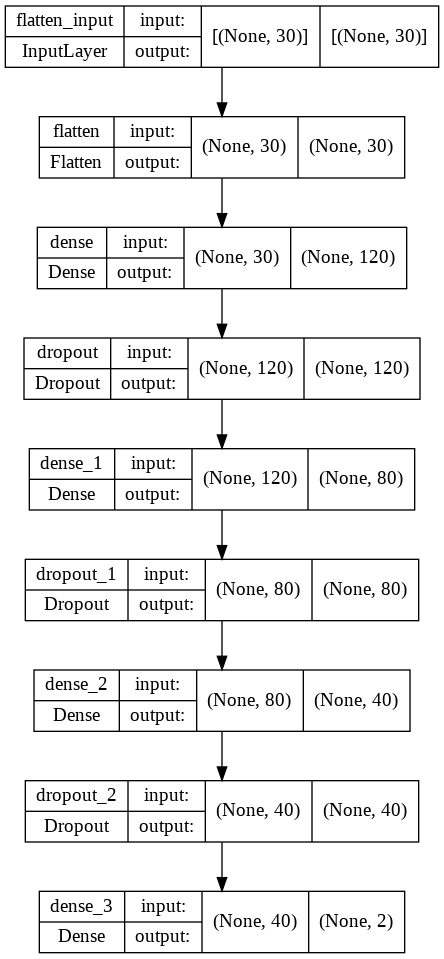

In [10]:
keras.utils.plot_model(model, "cancer_model.png", show_shapes=True)

In [11]:
#optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
#optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
#optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
#optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer ="sgd"

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 0.7878 - accuracy: 0.6113 - val_loss: 0.5560 - val_accuracy: 0.8505
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5589 - accuracy: 0.7367 - val_loss: 0.4553 - val_accuracy: 0.9159
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4995 - accuracy: 0.8150 - val_loss: 0.3807 - val_accuracy: 0.9252
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4145 - accuracy: 0.8589 - val_loss: 0.3287 - val_accuracy: 0.9346
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3546 - accuracy: 0.8966 - val_loss: 0.2872 - val_accuracy: 0.9439
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3254 - accuracy: 0.8997 - val_loss: 0.2567 - val_accuracy: 0.9439
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2874 - accuracy: 0.9060 - val_loss: 0.2321 - val_accuracy: 0.9439
Epoch 8/100

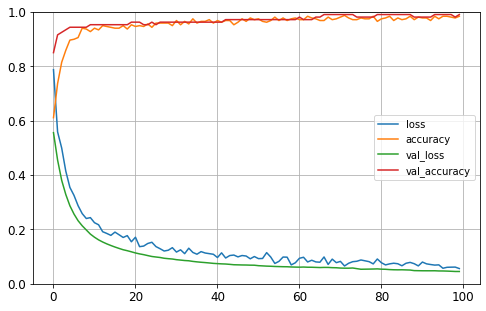

In [14]:
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [15]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9790


[0.06105995178222656, 0.9790209531784058]

In [16]:
X_new = X_test[:20]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.06, 0.94],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.74, 0.26],
       [0.  , 1.  ],
       [0.09, 0.91],
       [0.97, 0.03],
       [0.02, 0.98],
       [0.96, 0.04],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ]], dtype=float32)

In [17]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [18]:
y_test[:20]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])